In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [2]:
# Función para suavizar las señales
def butter_lowpass_filter(data, cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)

In [3]:
# Función para cargar datos
def cargar_datos(file_path):
    data = pd.read_csv(file_path, sep='\t', engine='python', decimal=',')
    data.columns = ['Time', 'X', 'Y']
    data = data.dropna()
    data['Time'] /= 1000  # Convertir ms a s
    return data

In [4]:
# Función para calcular velocidad y aceleración
def calcular_vel_acel(data, time):
    vel = np.gradient(data, time)
    acel = np.gradient(vel, time)
    return vel, acel

In [5]:
def calcular_angulo_horizontal(p1, p2):
    """
    Calcula el ángulo entre un segmento (p1, p2) y la horizontal en grados.
    """
    delta_x = p2[0] - p1[0]
    delta_y = p2[1] - p1[1]
    angulo = np.arctan2(delta_y, delta_x)  # Ángulo en radianes
    return np.degrees(angulo)  # Convertir a grados

In [6]:
# Función para calcular el módulo
def calcular_modulo(x, y):
    return np.sqrt(x**2 + y**2)

In [7]:
# Función para calcular ángulos en grados
def calcular_angulo(p1, p2, p3):
    v1 = np.array([p1[0] - p2[0], p1[1] - p2[1]])
    v2 = np.array([p3[0] - p2[0], p3[1] - p2[1]])
    angulo = np.arccos(np.clip(np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)), -1.0, 1.0))
    return np.degrees(angulo)

In [8]:
# Archivos de segmentos
file_paths = {
    'muñeca': r"C:\Users\fabia\Desktop\Trackeos\High_Elbow\Andy_high_elbow_sagital\muñeca.txt",
    'codo': r"C:\Users\fabia\Desktop\Trackeos\High_Elbow\Andy_high_elbow_sagital\codo.txt",
    'hombro': r"C:\Users\fabia\Desktop\Trackeos\High_Elbow\Andy_high_elbow_sagital\hombro_derecho.txt",
    'esp_med': r"C:\Users\fabia\Desktop\Trackeos\High_Elbow\Andy_high_elbow_sagital\mitad_torso.txt",
    'cad': r"C:\Users\fabia\Desktop\Trackeos\High_Elbow\Andy_high_elbow_sagital\cadera_derecha.txt",
}

In [9]:

# Cargar datos y suavizar
datos = {label: cargar_datos(path) for label, path in file_paths.items()}
fs = 1 / np.mean(np.diff(datos['muñeca']['Time']))
cutoff = min(20, 0.45 * fs)


In [10]:
for label in datos:
    datos[label]['X'] = butter_lowpass_filter(datos[label]['X'], cutoff, fs)
    datos[label]['Y'] = butter_lowpass_filter(datos[label]['Y'], cutoff, fs)

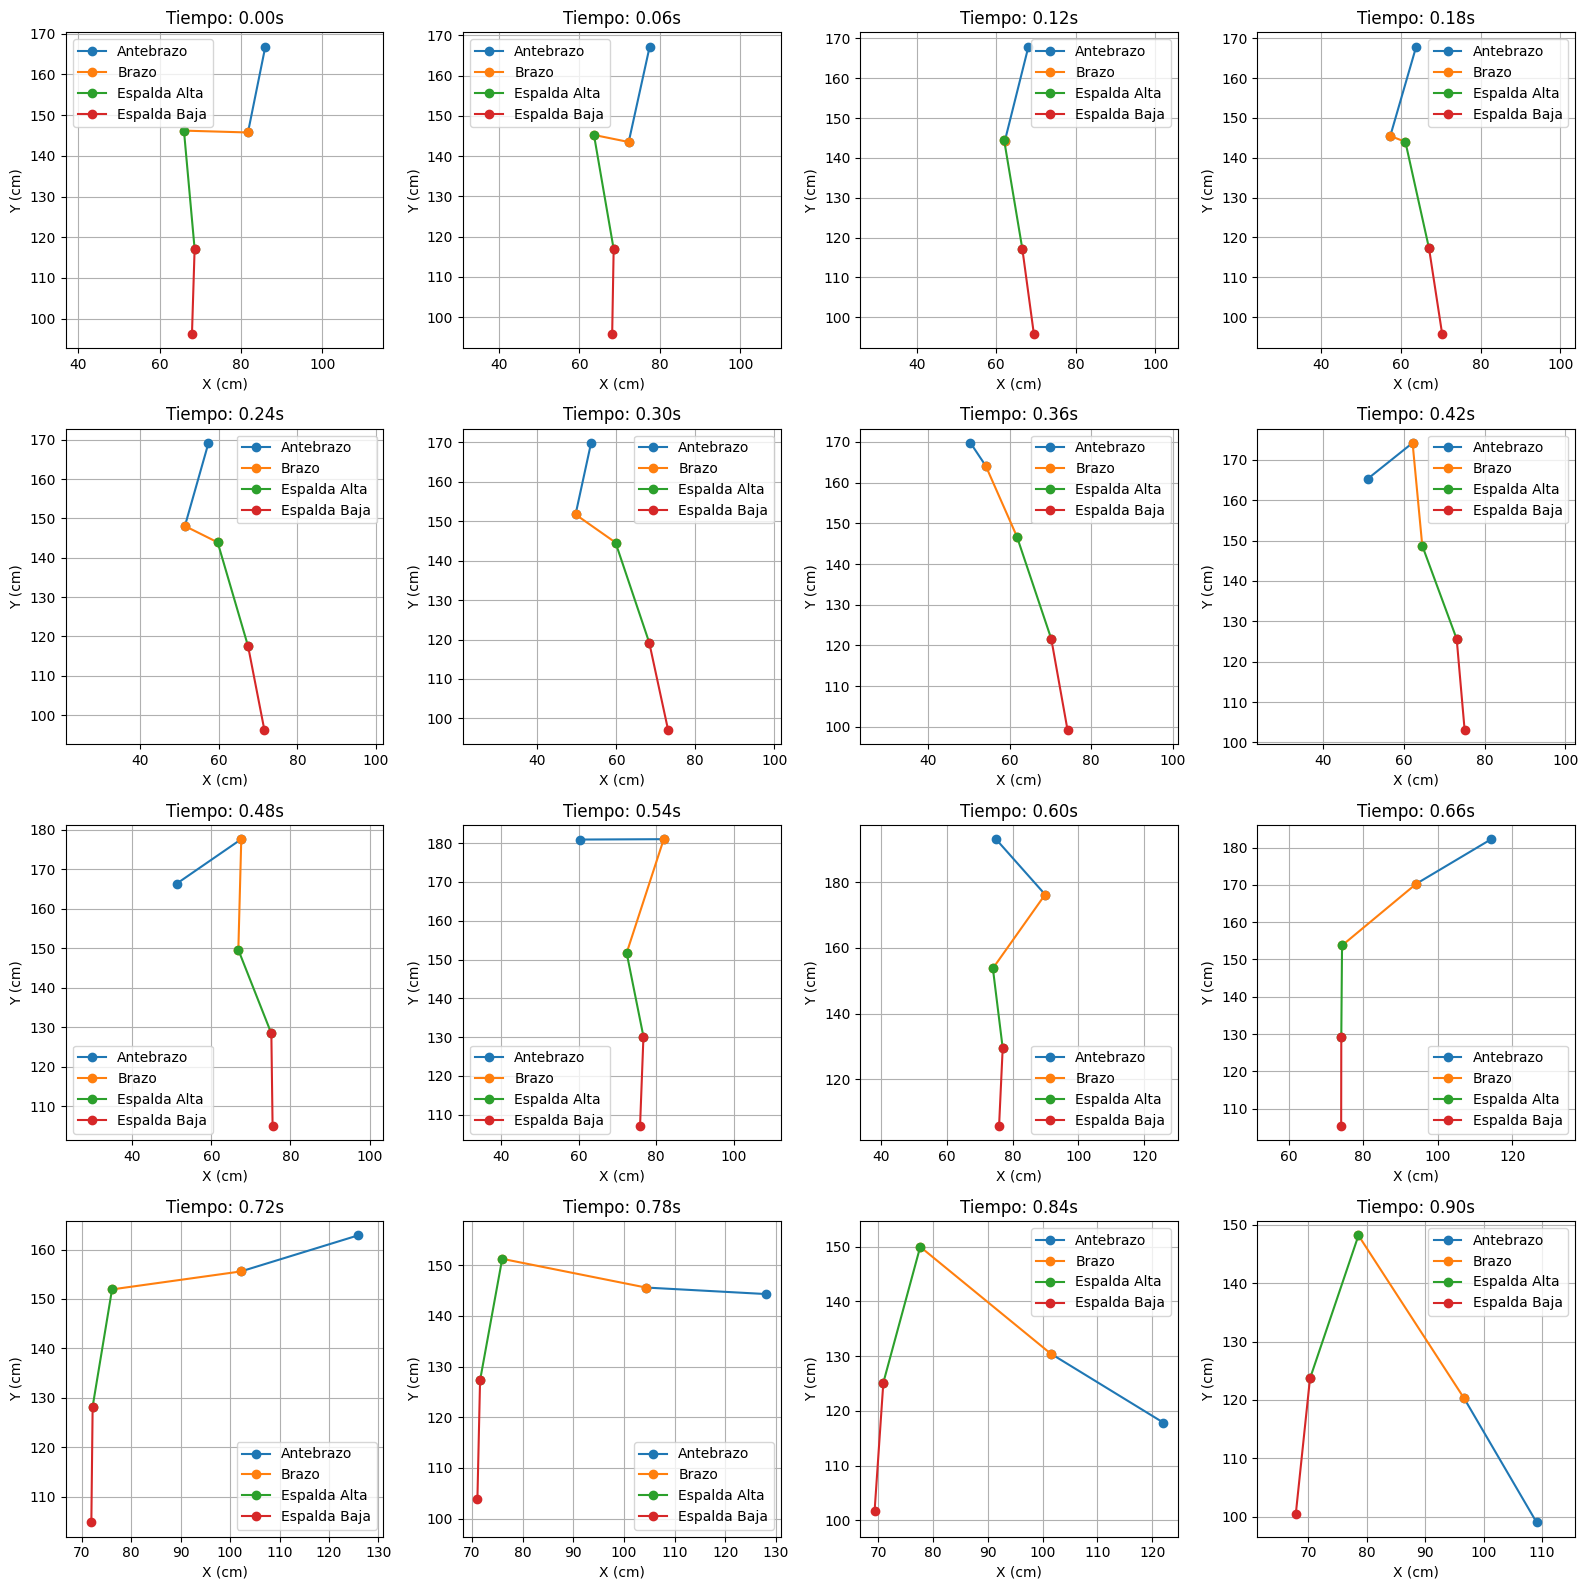

In [11]:
# Crear subplots de segmentos en 4x4
fig, axes = plt.subplots(4, 4, figsize=(16, 16))

# Dividir el tiempo en 16 posiciones equidistantes
tiempo_total = datos['muñeca']['Time']
tiempos_plot = np.linspace(tiempo_total.min(), tiempo_total.max(), 16)

# Para cada posición de tiempo seleccionada
for i, t in enumerate(tiempos_plot):
    ax = axes.flatten()[i]
    
    # Obtener las posiciones actuales de todos los puntos
    current_positions = {}
    for label in datos:
        idx = (np.abs(datos[label]['Time'] - t)).argmin()
        current_positions[label] = (datos[label]['X'][idx], datos[label]['Y'][idx])
    
    # Crear y dibujar todos los segmentos en el tiempo actual
    segmentos = [
        ('Antebrazo', current_positions['muñeca'], current_positions['codo']),
        ('Brazo', current_positions['codo'], current_positions['hombro']),
        ('Espalda Alta', current_positions['hombro'], current_positions['esp_med']),
        ('Espalda Baja', current_positions['esp_med'], current_positions['cad']),
    ]
    for nombre, inicio, fin in segmentos:
        ax.plot([inicio[0], fin[0]], [inicio[1], fin[1]], marker='o', label=nombre)

    # Configurar el subplot
    ax.set_title(f'Tiempo: {t:.2f}s')
    ax.set_xlabel('X (cm)')
    ax.set_ylabel('Y (cm)')
    ax.grid()
    ax.axis('equal')
    ax.legend()

plt.tight_layout()
plt.show()

Análisis dinámico para muñeca:
1.1 Velocidades:
   - Máxima: 613.19 cm/s en t = 0.63 s
   - Mínima: 27.24 cm/s en t = 0.43 s
1.2 Aceleraciones:
   - Máxima: 7597.16 cm/s² en t = 0.60 s
   - Mínima: 214.64 cm/s² en t = 0.10 s
--------------------------------------------------


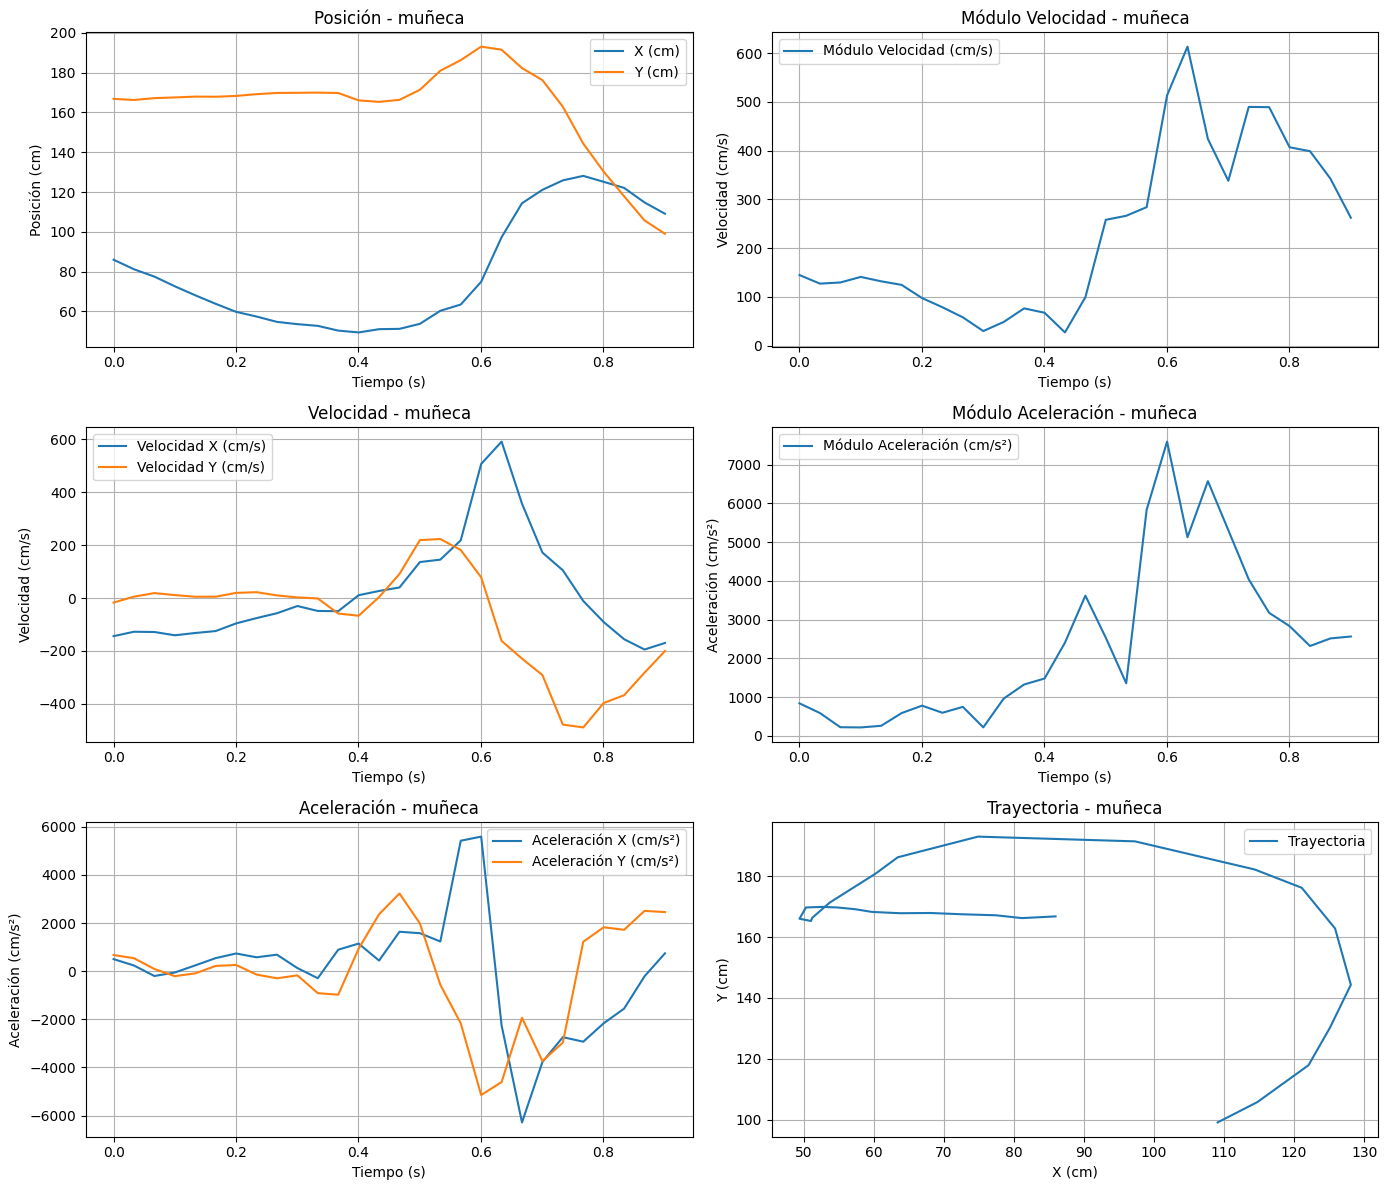

Análisis dinámico para codo:
1.1 Velocidades:
   - Máxima: 291.32 cm/s en t = 0.73 s
   - Mínima: 60.83 cm/s en t = 0.27 s
1.2 Aceleraciones:
   - Máxima: 2408.25 cm/s² en t = 0.30 s
   - Mínima: 583.77 cm/s² en t = 0.10 s
--------------------------------------------------


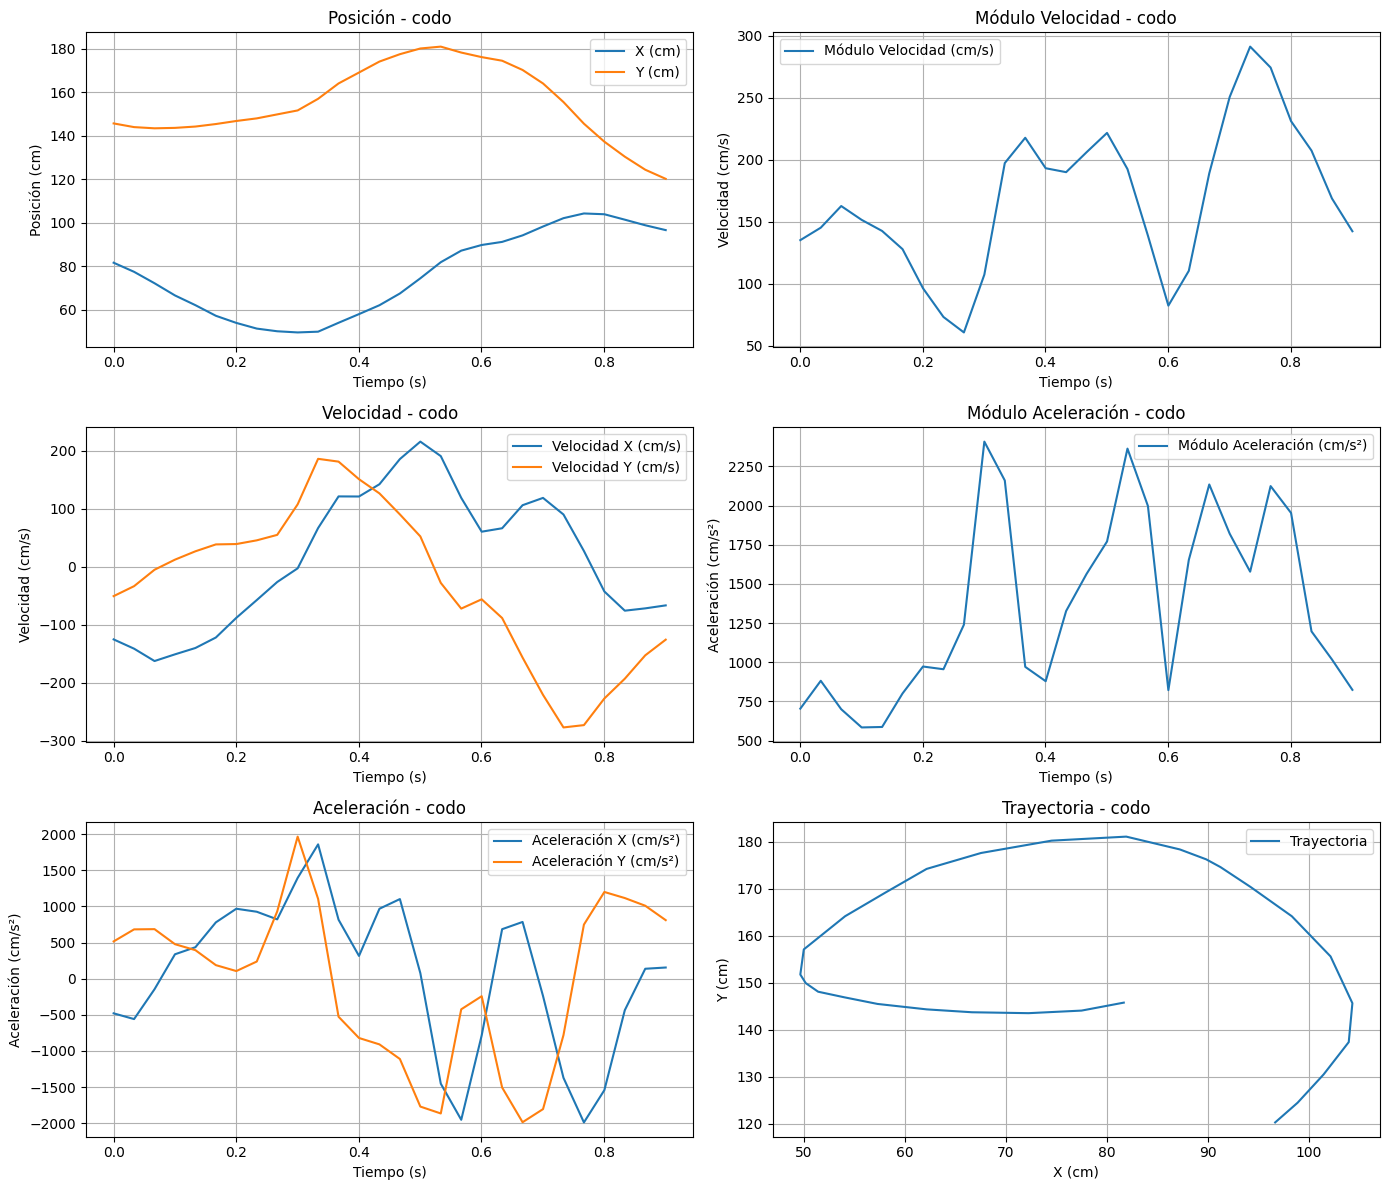

Análisis dinámico para hombro:
1.1 Velocidades:
   - Máxima: 89.12 cm/s en t = 0.50 s
   - Mínima: 4.60 cm/s en t = 0.67 s
1.2 Aceleraciones:
   - Máxima: 895.26 cm/s² en t = 0.53 s
   - Mínima: 28.93 cm/s² en t = 0.13 s
--------------------------------------------------


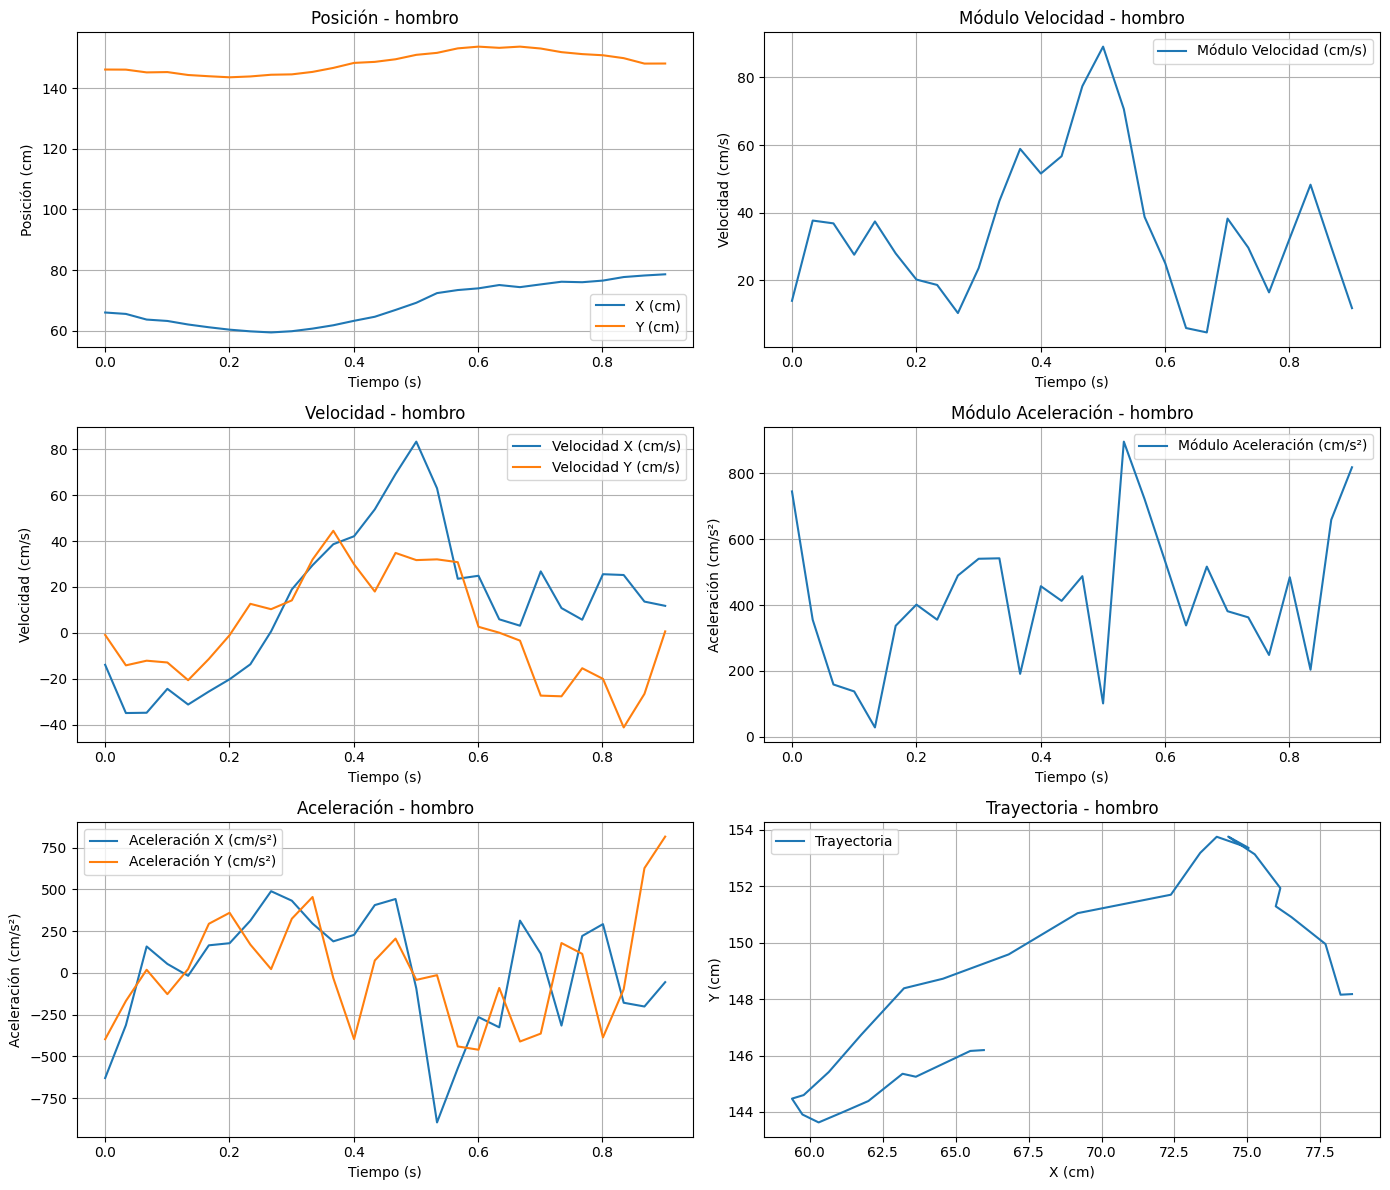

Análisis dinámico para esp_med:
1.1 Velocidades:
   - Máxima: 94.62 cm/s en t = 0.43 s
   - Mínima: 3.79 cm/s en t = 0.03 s
1.2 Aceleraciones:
   - Máxima: 1004.30 cm/s² en t = 0.50 s
   - Mínima: 42.40 cm/s² en t = 0.17 s
--------------------------------------------------


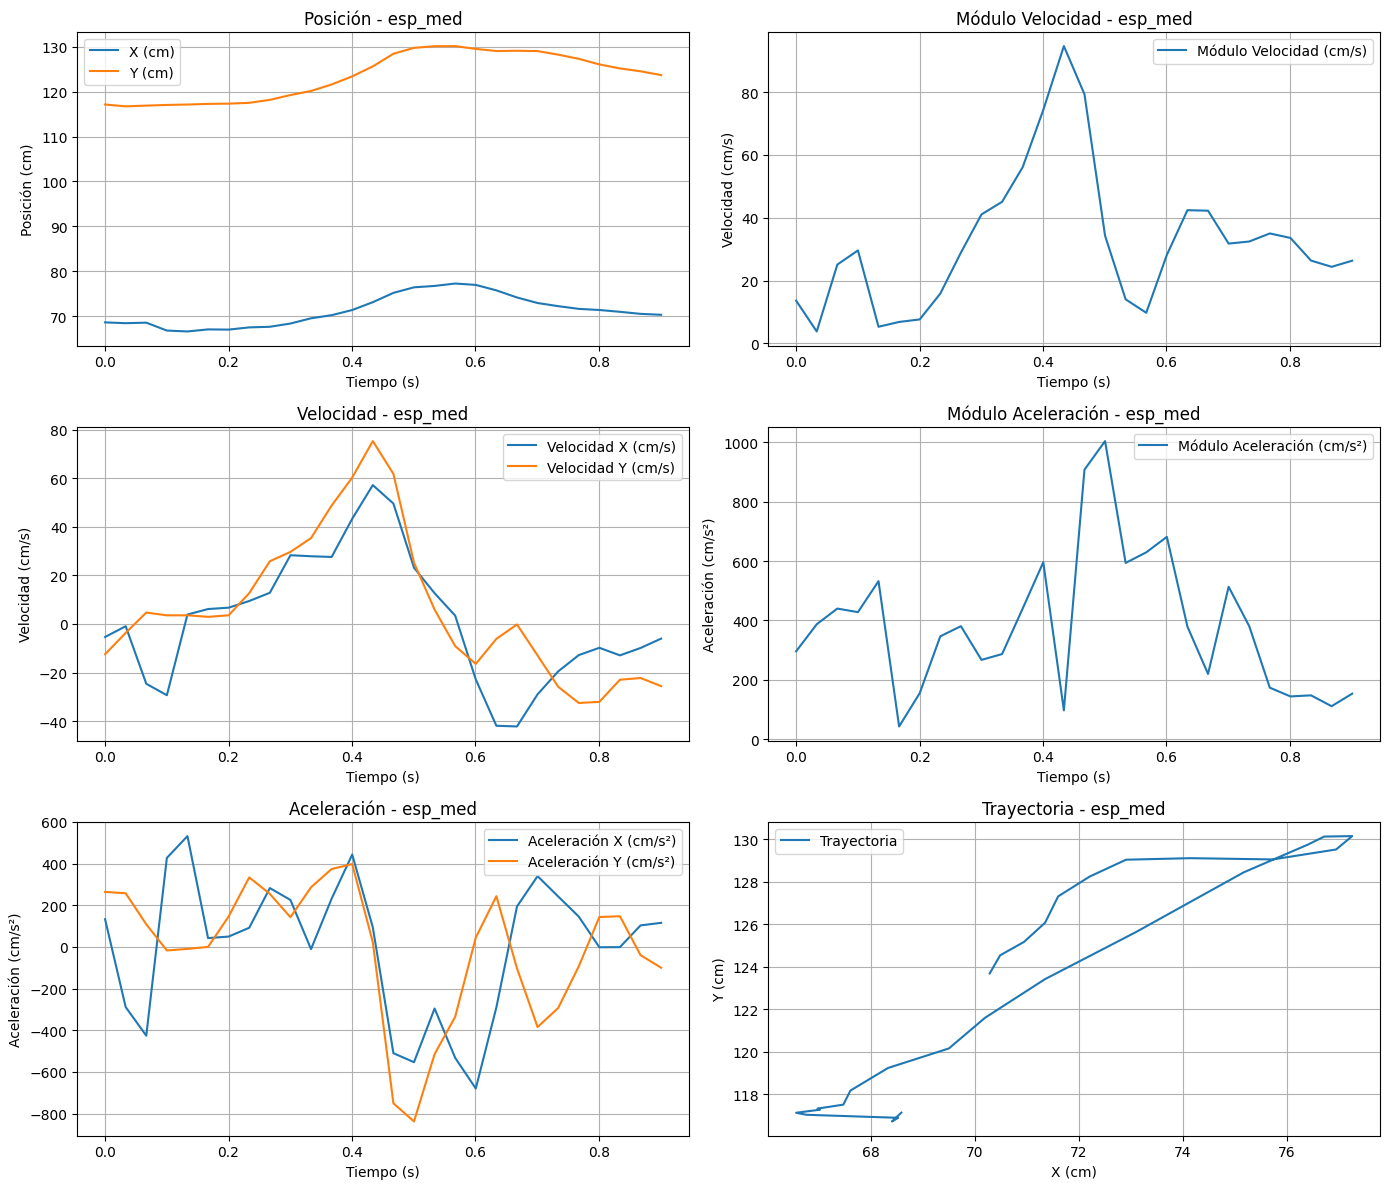

Análisis dinámico para cad:
1.1 Velocidades:
   - Máxima: 60.27 cm/s en t = 0.47 s
   - Mínima: 6.67 cm/s en t = 0.00 s
1.2 Aceleraciones:
   - Máxima: 1142.56 cm/s² en t = 0.50 s
   - Mínima: 28.49 cm/s² en t = 0.43 s
--------------------------------------------------


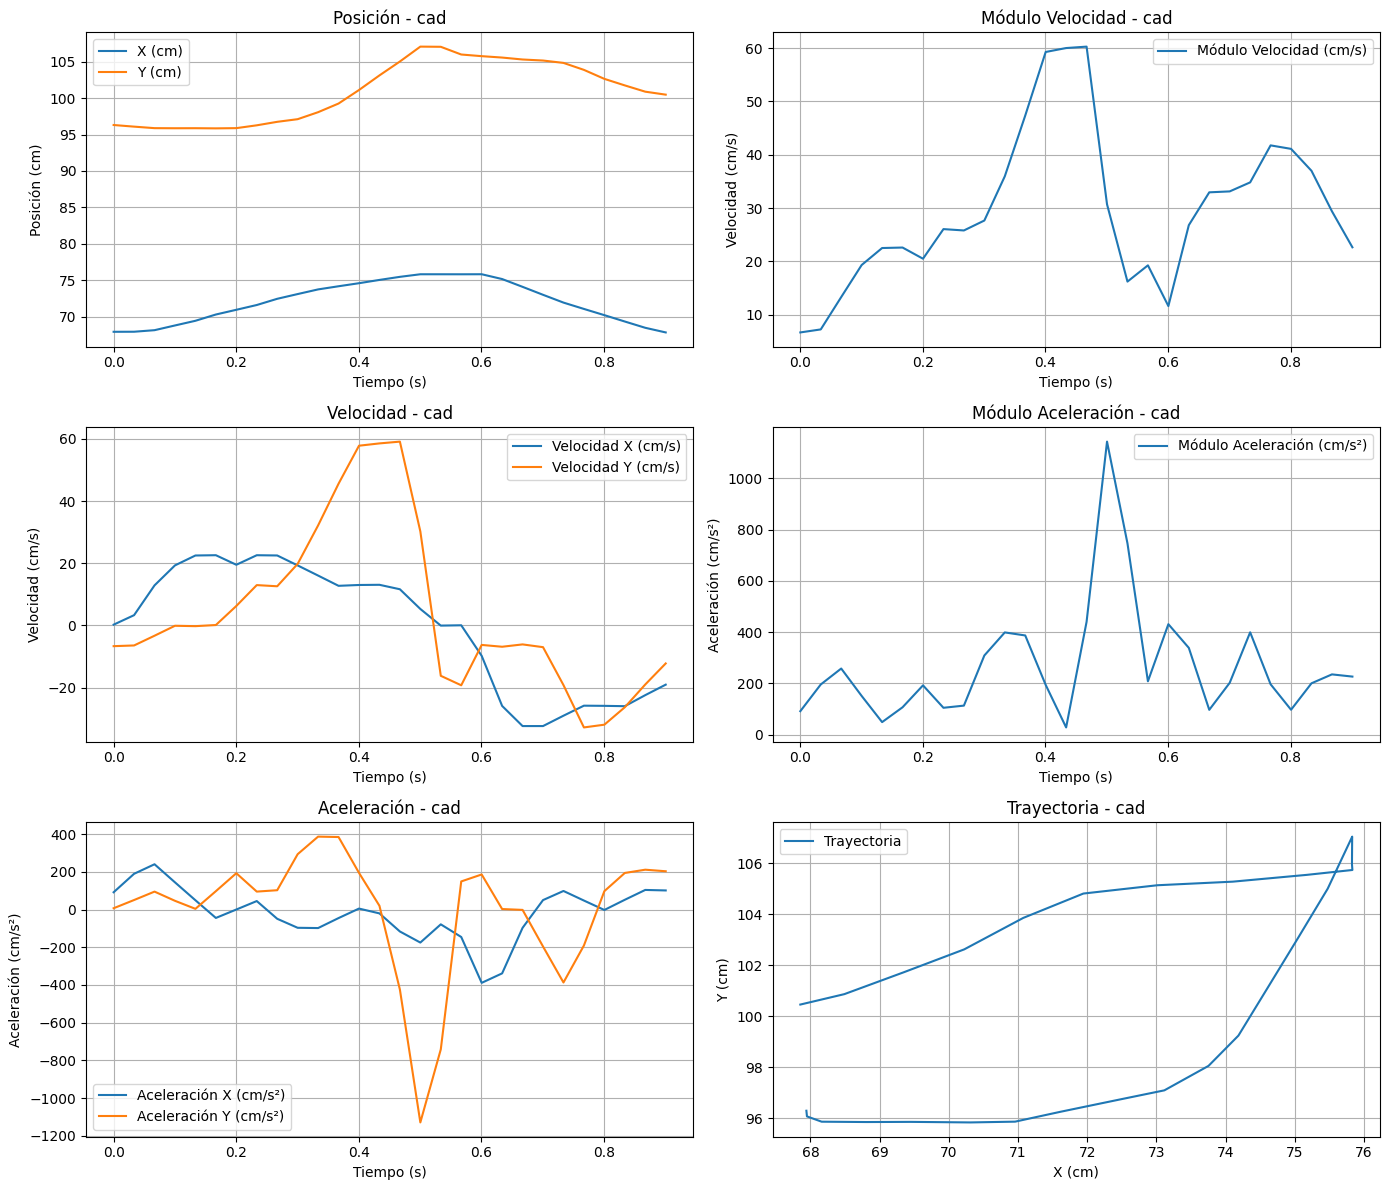

In [12]:
for label in datos:
    tiempo = datos[label]['Time']
    x = datos[label]['X']
    y = datos[label]['Y']

    # Calcular velocidad y aceleración
    vel_x, acel_x = calcular_vel_acel(x, tiempo)
    vel_y, acel_y = calcular_vel_acel(y, tiempo)
    modulo_vel = calcular_modulo(vel_x, vel_y)
    modulo_acel = calcular_modulo(acel_x, acel_y)

    # Encontrar velocidades máximas y mínimas en los módulos
    vel_max = np.max(modulo_vel)
    vel_min = np.min(modulo_vel)
    t_vel_max = tiempo[np.argmax(modulo_vel)]
    t_vel_min = tiempo[np.argmin(modulo_vel)]

    # Encontrar aceleraciones máximas y mínimas en los módulos
    acel_max = np.max(modulo_acel)
    acel_min = np.min(modulo_acel)
    t_acel_max = tiempo[np.argmax(modulo_acel)]
    t_acel_min = tiempo[np.argmin(modulo_acel)]

    # Display de valores extremos antes de plotear
    print(f"Análisis dinámico para {label}:")
    print(f"1.1 Velocidades:")
    print(f"   - Máxima: {vel_max:.2f} cm/s en t = {t_vel_max:.2f} s")
    print(f"   - Mínima: {vel_min:.2f} cm/s en t = {t_vel_min:.2f} s")
    print(f"1.2 Aceleraciones:")
    print(f"   - Máxima: {acel_max:.2f} cm/s² en t = {t_acel_max:.2f} s")
    print(f"   - Mínima: {acel_min:.2f} cm/s² en t = {t_acel_min:.2f} s")
    print("-" * 50)

    # Gráficos
    fig, axs = plt.subplots(3, 2, figsize=(14, 12))

    # Posición
    axs[0, 0].plot(tiempo, x, label='X (cm)')
    axs[0, 0].plot(tiempo, y, label='Y (cm)')
    axs[0, 0].set_title(f'Posición - {label}')
    axs[0, 0].set_xlabel('Tiempo (s)')
    axs[0, 0].set_ylabel('Posición (cm)')
    axs[0, 0].grid(True)
    axs[0, 0].legend()

    # Velocidad
    axs[1, 0].plot(tiempo, vel_x, label='Velocidad X (cm/s)')
    axs[1, 0].plot(tiempo, vel_y, label='Velocidad Y (cm/s)')
    axs[1, 0].set_title(f'Velocidad - {label}')
    axs[1, 0].set_xlabel('Tiempo (s)')
    axs[1, 0].set_ylabel('Velocidad (cm/s)')
    axs[1, 0].grid(True)
    axs[1, 0].legend()

    # Aceleración
    axs[2, 0].plot(tiempo, acel_x, label='Aceleración X (cm/s²)')
    axs[2, 0].plot(tiempo, acel_y, label='Aceleración Y (cm/s²)')
    axs[2, 0].set_title(f'Aceleración - {label}')
    axs[2, 0].set_xlabel('Tiempo (s)')
    axs[2, 0].set_ylabel('Aceleración (cm/s²)')
    axs[2, 0].grid(True)
    axs[2, 0].legend()

    # Módulo de velocidad
    axs[0, 1].plot(tiempo, modulo_vel, label='Módulo Velocidad (cm/s)')
    axs[0, 1].set_title(f'Módulo Velocidad - {label}')
    axs[0, 1].set_xlabel('Tiempo (s)')
    axs[0, 1].set_ylabel('Velocidad (cm/s)')
    axs[0, 1].grid(True)
    axs[0, 1].legend()

    # Módulo de aceleración
    axs[1, 1].plot(tiempo, modulo_acel, label='Módulo Aceleración (cm/s²)')
    axs[1, 1].set_title(f'Módulo Aceleración - {label}')
    axs[1, 1].set_xlabel('Tiempo (s)')
    axs[1, 1].set_ylabel('Aceleración (cm/s²)')
    axs[1, 1].grid(True)
    axs[1, 1].legend()

    # Trayectoria
    axs[2, 1].plot(x, y, label='Trayectoria')
    axs[2, 1].set_title(f'Trayectoria - {label}')
    axs[2, 1].set_xlabel('X (cm)')
    axs[2, 1].set_ylabel('Y (cm)')
    axs[2, 1].grid(True)
    axs[2, 1].legend()

    plt.tight_layout()
    plt.show()




In [13]:
# Función para calcular velocidad y aceleración angular
def calcular_vel_acel_angular(angulos, tiempo):
    vel_angular = np.gradient(angulos, tiempo)
    acel_angular = np.gradient(vel_angular, tiempo)
    return vel_angular, acel_angular


In [14]:
# Cálculo de ángulos
tiempo = datos['muñeca']['Time']
angulos = {
    'Codo': [
        calcular_angulo(
            (datos['muñeca']['X'][i], datos['muñeca']['Y'][i]),
            (datos['codo']['X'][i], datos['codo']['Y'][i]),
            (datos['hombro']['X'][i], datos['hombro']['Y'][i])
        ) for i in range(len(tiempo))
    ],
    'Hombro': [
        calcular_angulo(
            (datos['codo']['X'][i], datos['codo']['Y'][i]),
            (datos['hombro']['X'][i], datos['hombro']['Y'][i]),
            (datos['esp_med']['X'][i], datos['esp_med']['Y'][i])
        ) for i in range(len(tiempo))
    ],
    'Espalda Media': [
        calcular_angulo(
            (datos['hombro']['X'][i], datos['hombro']['Y'][i]),
            (datos['esp_med']['X'][i], datos['esp_med']['Y'][i]),
            (datos['cad']['X'][i], datos['cad']['Y'][i])
        ) for i in range(len(tiempo))
    ],
    'Cadera': [
        calcular_angulo_horizontal(
            (datos['esp_med']['X'][i], datos['esp_med']['Y'][i]),
            (datos['cad']['X'][i], datos['cad']['Y'][i])
        ) for i in range(len(tiempo))
    ]
}

Análisis angular para Codo:
1. Velocidades angulares:
   - Máxima: 1236.43 °/s en t = 0.60 s
   - Mínima: -1699.68 °/s en t = 0.40 s
2. Aceleraciones angulares:
   - Máxima: 25439.80 °/s² en t = 0.43 s
   - Mínima: -38347.13 °/s² en t = 0.37 s
--------------------------------------------------


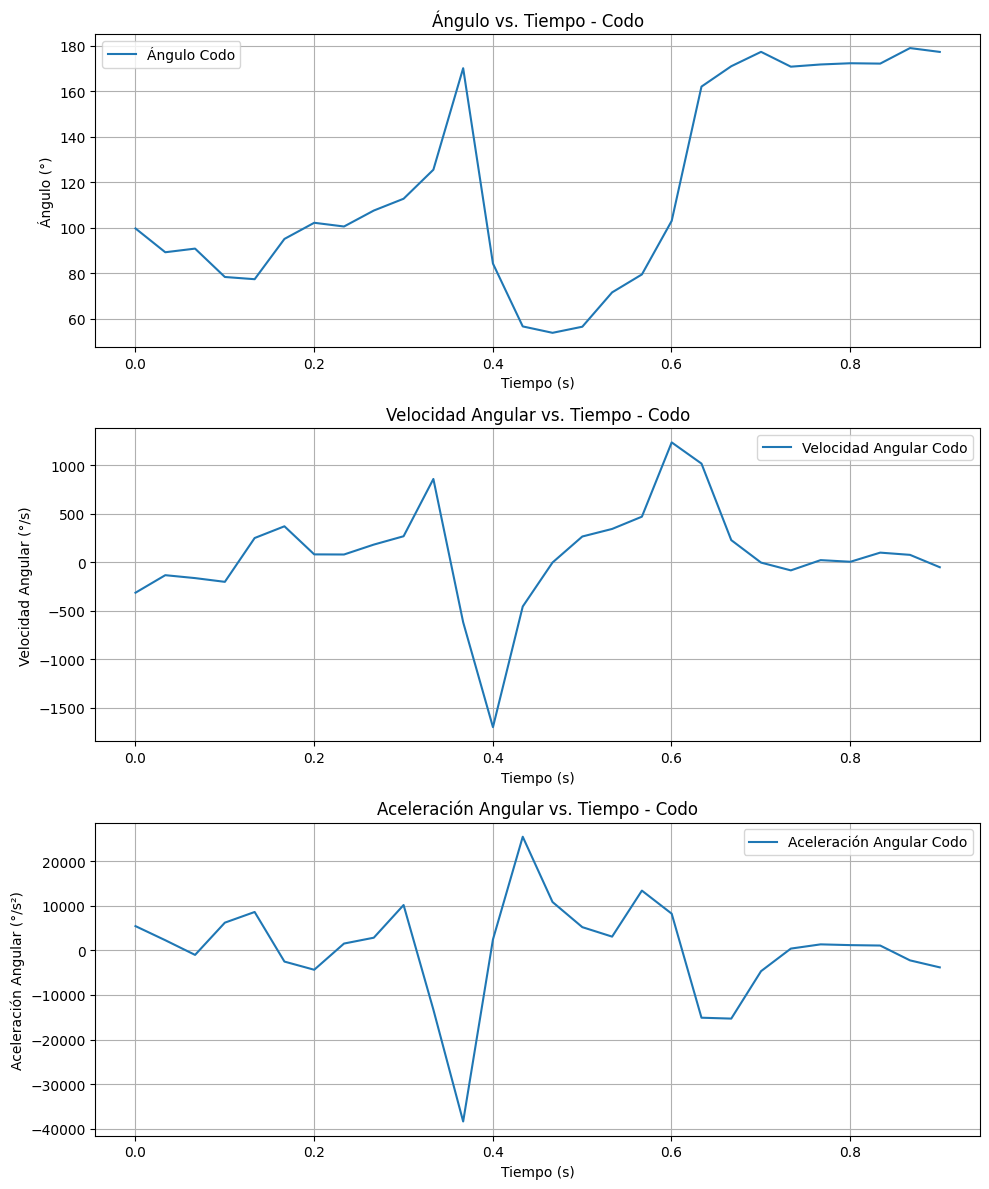

Análisis angular para Hombro:
1. Velocidades angulares:
   - Máxima: 1162.25 °/s en t = 0.17 s
   - Mínima: -478.80 °/s en t = 0.73 s
2. Aceleraciones angulares:
   - Máxima: 20735.02 °/s² en t = 0.13 s
   - Mínima: -15992.13 °/s² en t = 0.20 s
--------------------------------------------------


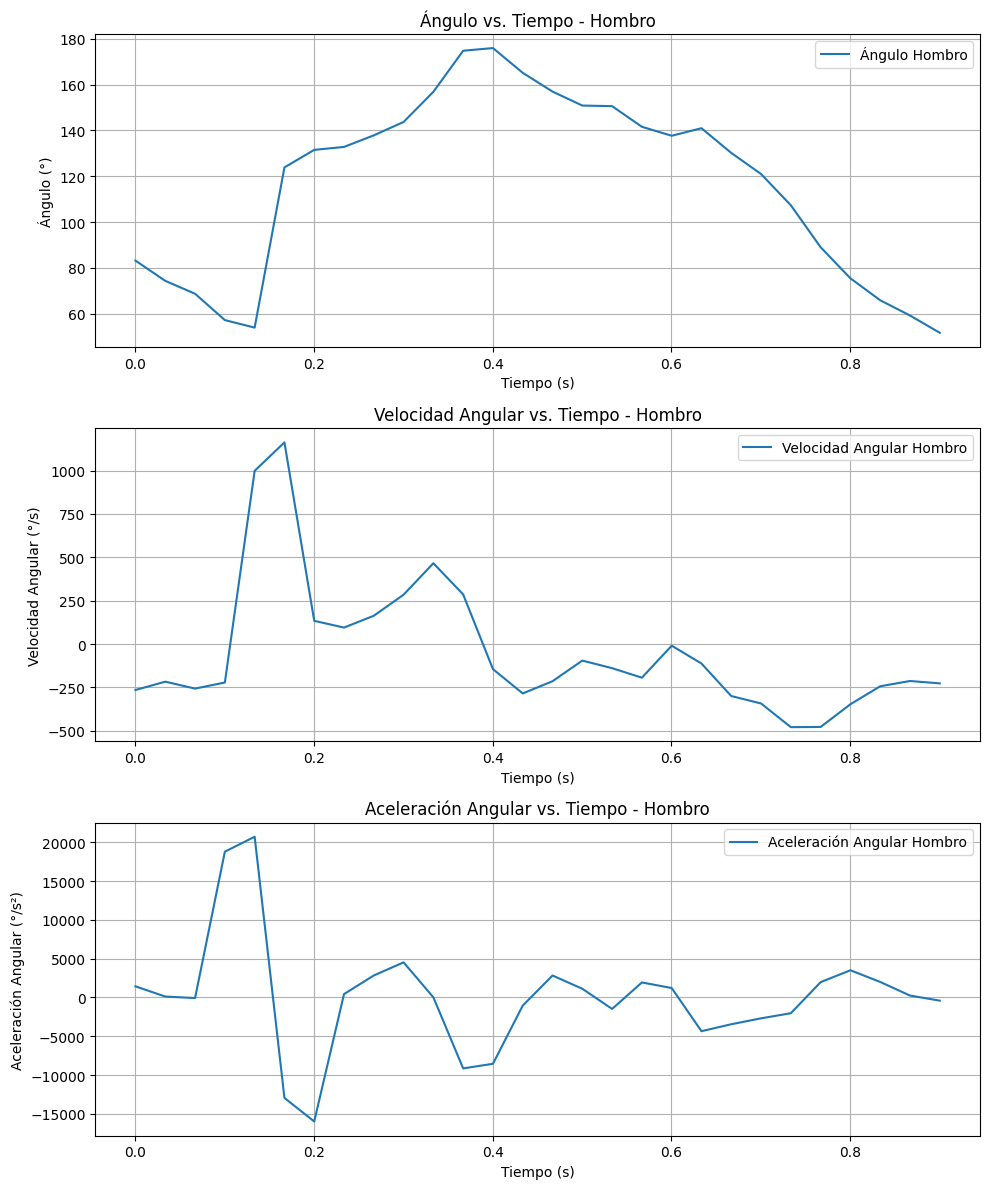

Análisis angular para Espalda Media:
1. Velocidades angulares:
   - Máxima: 149.05 °/s en t = 0.60 s
   - Mínima: -166.05 °/s en t = 0.43 s
2. Aceleraciones angulares:
   - Máxima: 4112.17 °/s² en t = 0.47 s
   - Mínima: -3973.36 °/s² en t = 0.67 s
--------------------------------------------------


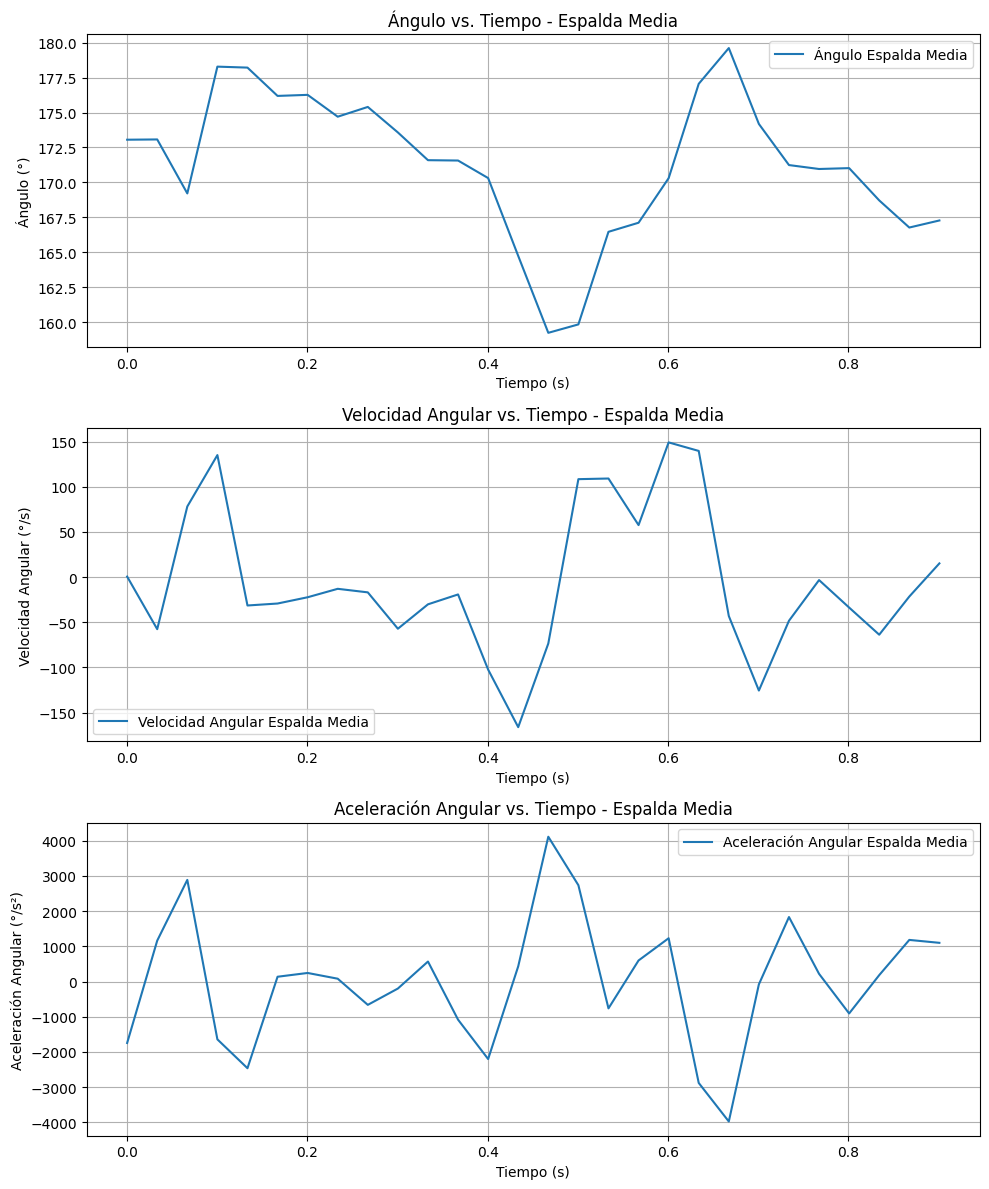

Análisis angular para Cadera:
1. Velocidades angulares:
   - Máxima: 130.64 °/s en t = 0.10 s
   - Mínima: -113.10 °/s en t = 0.43 s
2. Aceleraciones angulares:
   - Máxima: 1781.81 °/s² en t = 0.07 s
   - Mínima: -1330.89 °/s² en t = 0.13 s
--------------------------------------------------


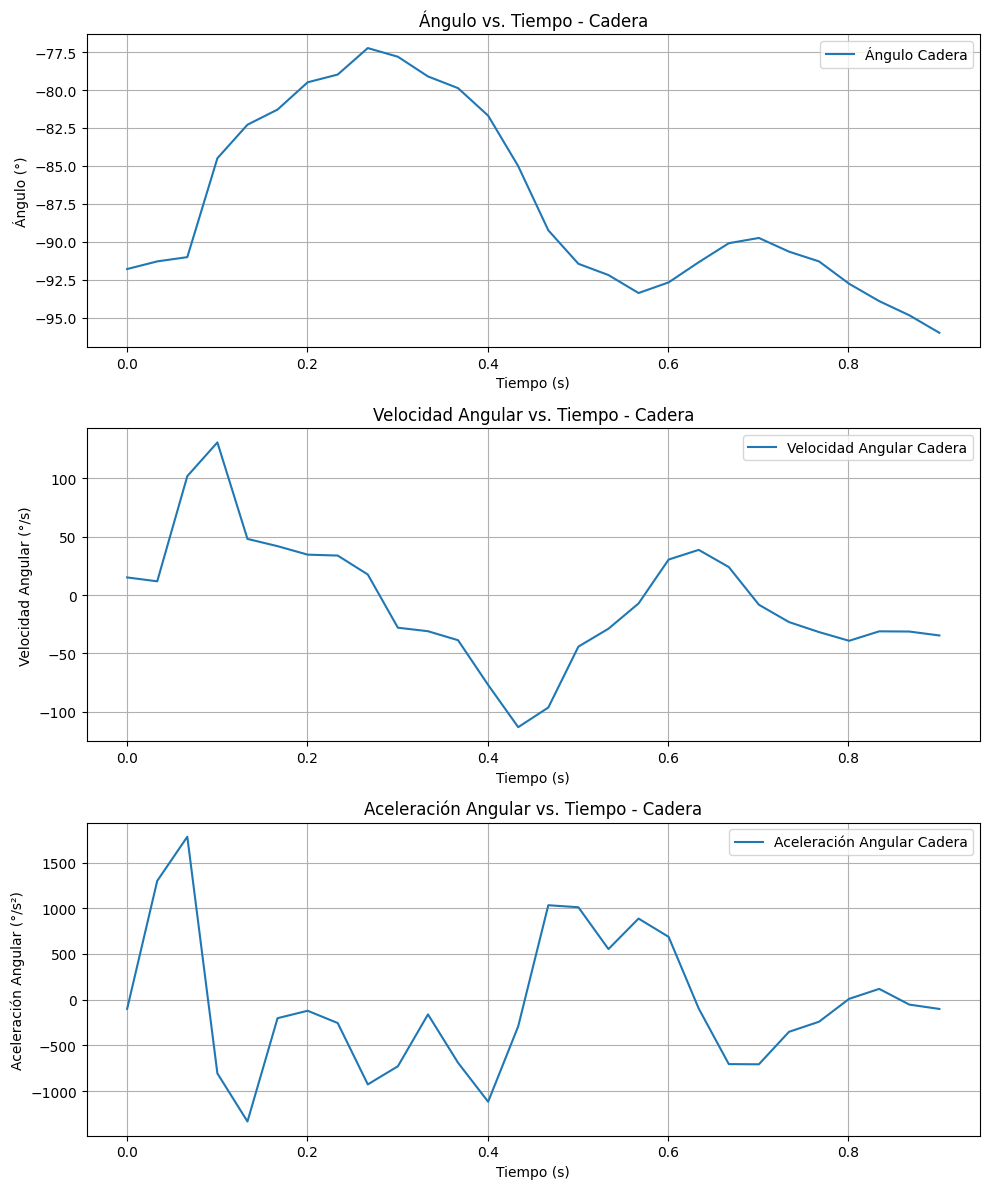

In [15]:
# Análisis cinemático angular general
for nombre, valores in angulos.items():
    # Convertir a array para facilitar cálculos
    valores = np.array(valores)
    
    # Calcular velocidad y aceleración angular
    vel_angular, acel_angular = calcular_vel_acel_angular(valores, tiempo)
    
    # Encontrar valores extremos para velocidad y aceleración angular
    vel_max = np.max(vel_angular)
    vel_min = np.min(vel_angular)
    t_vel_max = tiempo[np.argmax(vel_angular)]
    t_vel_min = tiempo[np.argmin(vel_angular)]

    acel_max = np.max(acel_angular)
    acel_min = np.min(acel_angular)
    t_acel_max = tiempo[np.argmax(acel_angular)]
    t_acel_min = tiempo[np.argmin(acel_angular)]

    # Display de valores extremos
    print(f"Análisis angular para {nombre}:")
    print(f"1. Velocidades angulares:")
    print(f"   - Máxima: {vel_max:.2f} °/s en t = {t_vel_max:.2f} s")
    print(f"   - Mínima: {vel_min:.2f} °/s en t = {t_vel_min:.2f} s")
    print(f"2. Aceleraciones angulares:")
    print(f"   - Máxima: {acel_max:.2f} °/s² en t = {t_acel_max:.2f} s")
    print(f"   - Mínima: {acel_min:.2f} °/s² en t = {t_acel_min:.2f} s")
    print("-" * 50)

    # Graficar ángulo, velocidad y aceleración angular vs tiempo
    fig, axs = plt.subplots(3, 1, figsize=(10, 12))
    
    # Ángulo vs Tiempo
    axs[0].plot(tiempo, valores, label=f'Ángulo {nombre}')
    axs[0].set_title(f'Ángulo vs. Tiempo - {nombre}')
    axs[0].set_xlabel('Tiempo (s)')
    axs[0].set_ylabel('Ángulo (°)')
    axs[0].grid(True)
    axs[0].legend()

    # Velocidad Angular vs Tiempo
    axs[1].plot(tiempo, vel_angular, label=f'Velocidad Angular {nombre}')
    axs[1].set_title(f'Velocidad Angular vs. Tiempo - {nombre}')
    axs[1].set_xlabel('Tiempo (s)')
    axs[1].set_ylabel('Velocidad Angular (°/s)')
    axs[1].grid(True)
    axs[1].legend()

    # Aceleración Angular vs Tiempo
    axs[2].plot(tiempo, acel_angular, label=f'Aceleración Angular {nombre}')
    axs[2].set_title(f'Aceleración Angular vs. Tiempo - {nombre}')
    axs[2].set_xlabel('Tiempo (s)')
    axs[2].set_ylabel('Aceleración Angular (°/s²)')
    axs[2].grid(True)
    axs[2].legend()

    plt.tight_layout()
    plt.show()